In [1]:
# import necessary packages
import cdt
import ges
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

np.random.seed(0)

Detecting 1 CUDA device(s).


In [2]:
df = pd.read_stata("data/close_college.dta")
display(df.head())
df.shape

,nearc4,educ,black,smsa,south,married,exper,lwage
0,0,7,1,1,0,1.0,16,6.306275
1,0,12,0,1,0,1.0,9,6.175867
2,0,12,0,1,0,1.0,16,6.580639
3,1,11,0,1,0,1.0,10,5.521461
4,1,12,0,1,0,1.0,16,6.591674


(3010, 8)

In [9]:
import dowhy
from dowhy import CausalModel
from IPython.display import Image, display

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str


def dowhy_backdoor(file):

    # creating arbitrary data
    df = pd.read_stata("data/close_college.dta")

    gml_graph = gml_to_string(file)
    # With GML string
    model=CausalModel(
        data = df,
        treatment='educ',
        outcome='lwage',
        graph=gml_graph
    )

    identified_estimand = model.identify_effect()
    print(identified_estimand)

In [25]:
from graph import load_graph
import pandas as pd
import networkx as nx

G = load_graph(version=3)
#nx.draw(G, with_labels=True, node_size=1000, font_size=8)

In [28]:
gml_graph = gml_to_string('graph_files/graph_version3.gml')

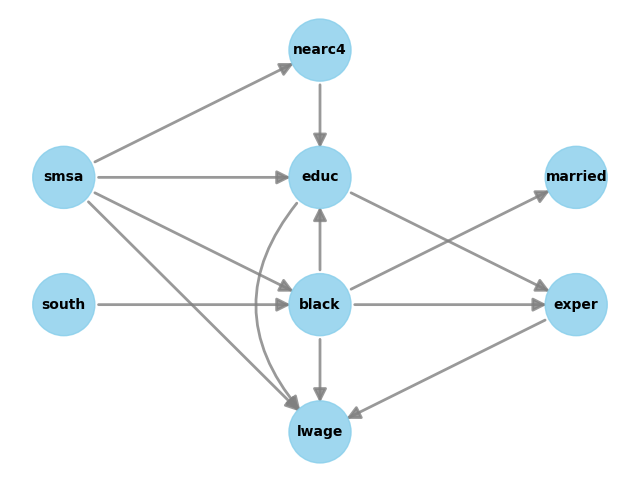

In [29]:
model=CausalModel(
        data = df,
        treatment='educ',
        outcome='lwage',
        graph=gml_graph
        )
model.view_model()

In [31]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                        
───────(E[lwage|smsa,black])
d[educ]                     
Estimand assumption 1, Unconfoundedness: If U→{educ} and U→lwage then P(lwage|educ,smsa,black,U) = P(lwage|educ,smsa,black)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [32]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                        
───────(E[lwage|smsa,black])
d[educ]                     
Estimand assumption 1, Unconfoundedness: If U→{educ} and U→lwage then P(lwage|educ,smsa,black,U) = P(lwage|educ,smsa,black)

## Realized estimand
b: lwage~educ+smsa+black
Target units: ate

## Estimate
Mean value: 0.035679609300339976

Causal Estimate is 0.035679609300339976


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [42]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Exception: Propensity score methods are applicable only for binary treatments

In [35]:
# using the instrumental variables
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.instrumental_variable")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Estimation failed! No relevant identified estimand available for this estimation method.
Causal Estimate is None
